# Importing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

# Setting style parameters
palette = sns.color_palette('Spectral', 5)
palette.reverse()
sns.set_theme(style='white', palette=palette)

df_initial_data = pd.read_excel('./data_sources/Dataset Task 2.xlsx', sheet_name='Data')

palette

[(0.3280276816608997, 0.6805074971164936, 0.6802768166089965),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806)]

In [2]:
df_initial_data.head() 

,Created Date,Country,City,Restaurant ID,Restaurant Name,Order State,Cancel Reason,Cuisine,Platform,Payment Method,Card Issuer,Products in Order,Order Value € (Gross),Delivery Fee,Delivery Time
0,28.02.2020,Portugal,Lisbon,7238,Chirashi - Alvalade,delivered,NaN,Sushi,ios,cashless,BANKINTER S.A.,13,89.30,0.0,17.7
1,28.02.2020,Portugal,Lisbon,12758,Istanbul Kebab Pizza - Alameda,delivered,NaN,Pizza,android,cashless,BANCO COMERCIAL PORTUGUES S.A.,1,10.00,0.0,16.3
2,28.02.2020,Portugal,Lisbon,6631,A-100 - Lisboa,delivered,NaN,Burgers,ios,cashless,BANCO COMERCIAL PORTUGUES S.A.,2,16.96,0.0,13.6
3,28.02.2020,Portugal,Lisbon,10535,La Paparrucha - Parrilla Argentina,delivered,NaN,South American,ios,cashless,ING BANK N.V.,3,25.15,4.2,26.1
4,28.02.2020,Portugal,Lisbon,9695,Choupana Caffe,delivered,NaN,Brunch,ios,cashless,INTESA SANPAOLO SPA,3,16.00,0.0,11.6


In [3]:
def clean_df(df):
    def clean_text(string):
        # Remove all characters that are not letters, numbers, or spaces
        cleaned_string = re.sub(r'[^\s\sA-Za-z0-9_\.]+', '', string)
        # Strip leading and trailing spaces and tabulations
        cleaned_string = cleaned_string.strip()
        cleaned_string = cleaned_string.capitalize()
        return cleaned_string

    def clean_column_name(name):
        # Delete all info in brackets and replace spaces with underscores
        name_no_brackets = re.sub(r'\[.*?\]', '', name)
        name_num_corrected = re.sub(r'#', 'num', name_no_brackets)
        name_normalized = re.sub(r'\s+', '_', name_num_corrected)
        # Apply clean_text to the column name
        cleaned_name = clean_text(name_normalized)
        # Ensure lowercase for consistency
        return cleaned_name.lower()

    # Clean and normalize column names first
    df.columns = [clean_column_name(col) for col in df.columns]

    for col in df.columns:
        # Determine if the column is string type
        if df[col].dtype == 'object':
            # Replace null values with empty string for string columns
            df[col] = df[col].fillna('')
            df[col] = df[col].apply(lambda x: clean_text(x) if isinstance(x, str) else x)
        else:
            # Determine if the column is numerical (float or int)
            if np.issubdtype(df[col].dtype, np.number):
                # Replace null values with 0 for numerical columns
                df[col] = df[col].fillna(0)
                
    return df

df_clean = clean_df(df_initial_data.copy())

In [4]:
print(df_clean.created_date.count())
df_clean.head()

99618


,created_date,country,city,restaurant_id,restaurant_name,order_state,cancel_reason,cuisine,platform,payment_method,card_issuer,products_in_order,order_value__gross,delivery_fee,delivery_time
0,28.02.2020,Portugal,Lisbon,7238,Chirashi alvalade,Delivered,,Sushi,Ios,Cashless,Bankinter s.a.,13,89.30,0.0,17.7
1,28.02.2020,Portugal,Lisbon,12758,Istanbul kebab pizza alameda,Delivered,,Pizza,Android,Cashless,Banco comercial portugues s.a.,1,10.00,0.0,16.3
2,28.02.2020,Portugal,Lisbon,6631,A100 lisboa,Delivered,,Burgers,Ios,Cashless,Banco comercial portugues s.a.,2,16.96,0.0,13.6
3,28.02.2020,Portugal,Lisbon,10535,La paparrucha parrilla argentina,Delivered,,South american,Ios,Cashless,Ing bank n.v.,3,25.15,4.2,26.1
4,28.02.2020,Portugal,Lisbon,9695,Choupana caffe,Delivered,,Brunch,Ios,Cashless,Intesa sanpaolo spa,3,16.00,0.0,11.6


In [5]:
(
    df_clean[pd.to_datetime(df_clean['created_date'], infer_datetime_format=True).isna()]
).empty

True

In [6]:
df_clean['created_date'] = pd.to_datetime(df_clean['created_date'], infer_datetime_format=True)

In [7]:
sorted(df_clean.columns)

['cancel_reason',
 'card_issuer',
 'city',
 'country',
 'created_date',
 'cuisine',
 'delivery_fee',
 'delivery_time',
 'order_state',
 'order_value__gross',
 'payment_method',
 'platform',
 'products_in_order',
 'restaurant_id',
 'restaurant_name']

# Dataset exploration
Checking what values do we have in the dataset and what is the range for numeric ones. It is a preparation that is needed before starting the analysis itself.

## Dates range

In [8]:
#  What is the range of dates in the dataset?
df_clean['created_date'].min(), df_clean['created_date'].max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2020-02-28 00:00:00'))

In [9]:
# If there are any days without data inside this range?
min_date = df_clean['created_date'].min()
max_date = df_clean['created_date'].max()
date_range = pd.date_range(start=min_date, end=max_date, freq='D')

set(date_range).issubset(set(df_clean['created_date']))

True

In [10]:
# Adding weekday column to the dataframe to analyse dynamics of sales by week days.
df_clean['date'] = df_clean['created_date'] # Ctreating a shortcut for 'created_date'
df_clean['day_name'] = df_clean['date'].dt.day_name()
df_clean['weekday'] = df_clean['date'].dt.dayofweek + 1
df_clean['day_of_month'] = df_clean['date'].dt.day
df_clean['month_number'] = df_clean['date'].dt.month
df_clean[['date', 'day_name', 'weekday', 'month_number']].head(4)

,date,day_name,weekday,month_number
0,2020-02-28,Friday,5,2
1,2020-02-28,Friday,5,2
2,2020-02-28,Friday,5,2
3,2020-02-28,Friday,5,2


In [11]:
sorted(df_clean.columns)

['cancel_reason',
 'card_issuer',
 'city',
 'country',
 'created_date',
 'cuisine',
 'date',
 'day_name',
 'day_of_month',
 'delivery_fee',
 'delivery_time',
 'month_number',
 'order_state',
 'order_value__gross',
 'payment_method',
 'platform',
 'products_in_order',
 'restaurant_id',
 'restaurant_name',
 'weekday']

In [12]:
(
    df_clean['order_state']
    .unique()
)

array(['Delivered', 'Failed', 'Rejected'], dtype=object)

In [13]:
df_done = df_clean[df_clean.order_state == 'Delivered']

df_done.count()[0], df_clean.count()[0]

(97936, 99618)

# Research

## Seasonality

In [14]:
sorted(df_done['country'].unique())

['Ghana', 'Portugal']

### Orders
Let's first analyze how the number of orders evolves over time. Since I don't have order IDs in the data, I'll assume that each row represents a distinct order.

<AxesSubplot:xlabel='date'>

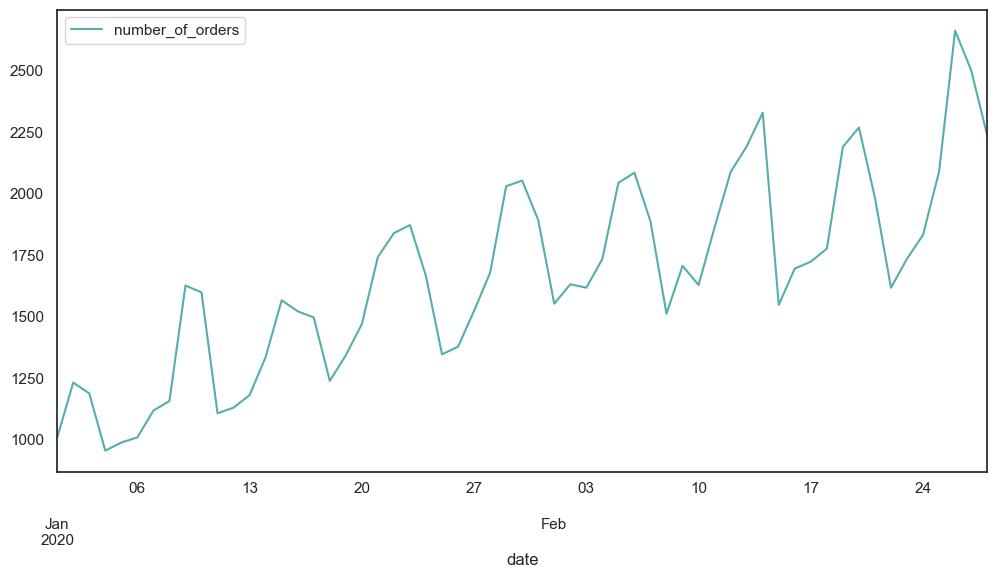

In [15]:
(
    df_done
    .groupby('date')
    .agg(
        number_of_orders=('order_state','count')
    )
    .sort_index()
    .plot(figsize=(12, 6))
)

In [16]:
df = (
    df_done
    .groupby(['date', 'country'])
    .agg(
        number_of_orders=('order_state','count')
    )
    .reset_index()
    .pivot(index='date', columns='country', values='number_of_orders')
    .sort_index()
)
df.head()

country,Ghana,Portugal
date,,
2020-01-01,124,882
2020-01-02,126,1104
2020-01-03,76,1110
2020-01-04,169,784
2020-01-05,198,788


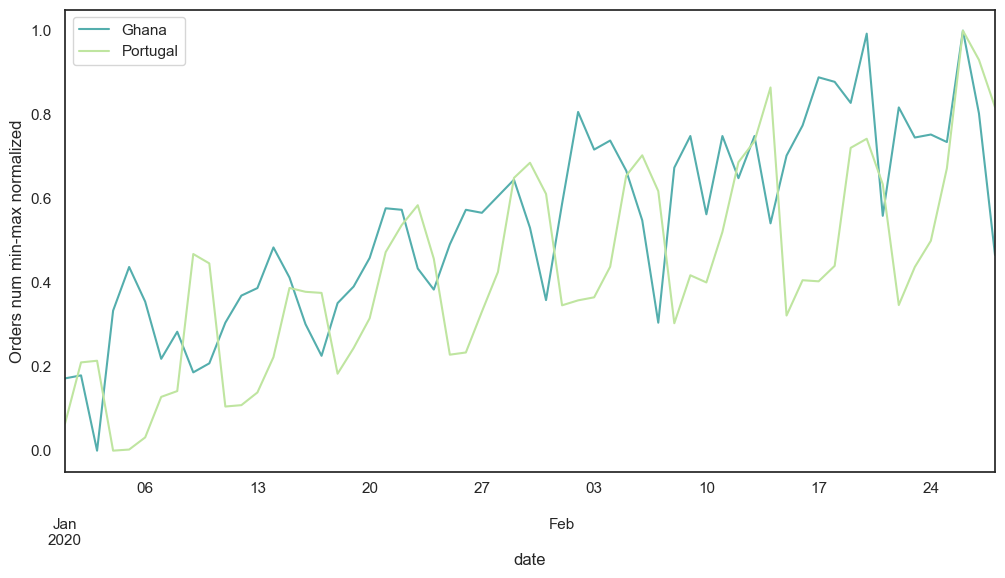

In [17]:
fig, ax1 = plt.subplots(figsize=(12,6))
for x in ['Ghana', 'Portugal']:
    (
        df[x]
        .pipe(lambda x: (x-x.min())/(x.max()-x.min()))
        .sort_index()
    ).plot(ax=ax1, label=x)

ax1.set_ylabel('Orders num min-max normalized')
plt.legend()

Ok, so both countries have a growing number of orders during 2 months of the year 2020. What's about seasonality in terms of the weekdays?

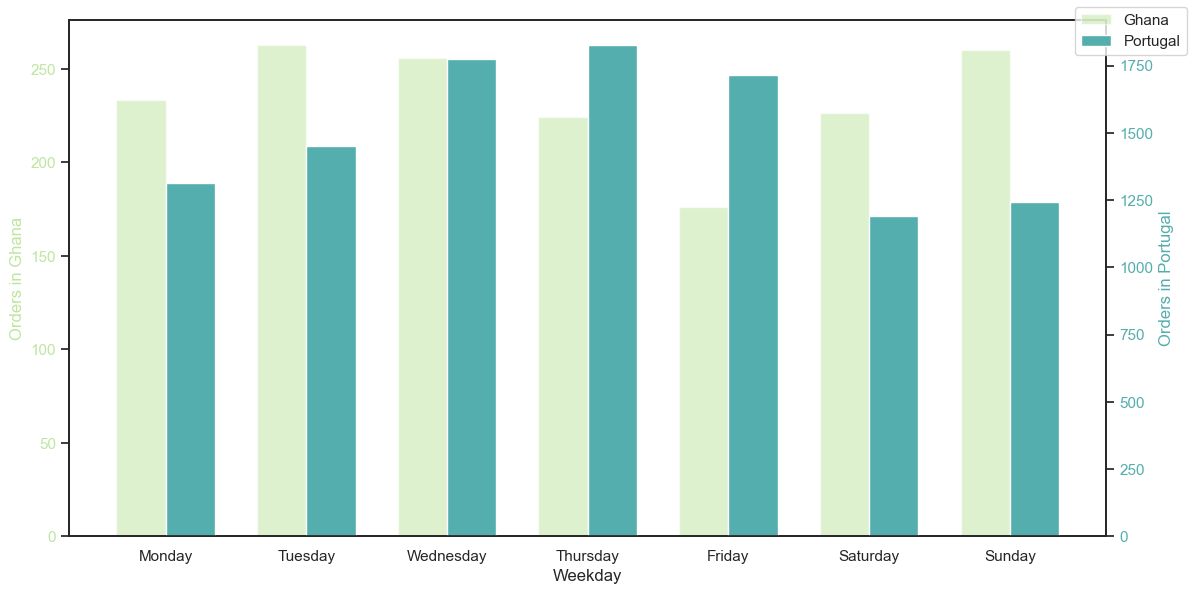

In [18]:
df = (
    df_done
    .groupby(['date', 'weekday', 'country'])
    .agg(
        number_of_orders=('order_state','count')
    )
    .reset_index()
    .groupby(['weekday', 'country'])
    .agg(
        number_of_orders=('number_of_orders','median')
    )
    .reset_index()
    .pivot(index='weekday', columns='country', values='number_of_orders')
    .reset_index()
    .copy()
)

weekday_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 
                 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df['weekday'] = df['weekday'].map(weekday_names)

# Color for each axis
color1 = palette[1]
color2 = palette[0]

# Ensure the index (or in this case, the 'weekday' column after resetting index) 
# is ordered correctly for plotting
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=weekdays_order, ordered=True)
df = df.sort_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(12,6))


ind = np.arange(len(df.index))
# The width of the bars
width = 0.35  

# Plot bars for Ghana
ax1.bar(ind - width/2, df['Ghana'], width, color=color1, label='Ghana', alpha=0.5)
ax1.set_xlabel('Weekday')
ax1.set_ylabel('Orders in Ghana', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Plot bars for Portugal on a second y-axis
ax2 = ax1.twinx()  
ax2.bar(ind + width/2, df['Portugal'], width, color=color2, label='Portugal')
ax2.set_ylabel('Orders in Portugal', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Set the x-axis tick labels to weekday names
ax1.set_xticks(ind)
ax1.set_xticklabels(weekdays_order)  # Use the ordered weekday names

fig.tight_layout()  
fig.legend()
plt.show()

## Orders prediction
I would argue that we don't have sufficient data to make predictions with a high degree of confidence. This is especially true given the presence of seasonality in the data, which necessitates having historical, year-over-year data to consider this factor accurately. However, to demonstrate how this analysis could be conducted with a larger dataset, we can train a simple regression model using the data we have and generate a prediction.

### Regression model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

df = (
    df_done
    .groupby(['date', 'country', 'day_of_month', 'month_number', 'weekday', 'restaurant_id'])
    .agg(orders_number=('date', 'count'))
    .reset_index()
    [['country', 'day_of_month', 'month_number', 'weekday', 'restaurant_id', 'orders_number']]
)

# Separating results and features
X = df.drop(columns=['orders_number'])
y = df['orders_number']

# OHT for categotical data
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['country', 'restaurant_id']),
], remainder='passthrough')

# Split the dataset into training and testing sets, to check then sq. error in case we change features list
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

# Adjusting and checking
y_pred = model.predict(X_test)
print(f'Model RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

# Now generating known march vals. Assuming all the restaurants will work every day.
march_dates = pd.date_range('2020-03-01', '2020-03-31')
unique_pairs = df[['restaurant_id', 'country']].drop_duplicates()
dfs = [unique_pairs.assign(date=d) for d in march_dates]
df_march = pd.concat(dfs, ignore_index=True)
df_march['day_of_month'] = df_march['date'].dt.day
df_march['month_number'] = df_march['date'].dt.month
df_march['weekday'] = df_march['date'].dt.dayofweek + 1  # +1 to match your weekday definition
df_march.drop(columns=['date'], inplace=True)

predictions = model.predict(df_march)
df_march['predicted_orders'] = predictions

print(df_march.head())

Model RMSE: 2.7309168248925615
   restaurant_id country  day_of_month  month_number  weekday  \
0           6464   Ghana             1             3        7   
1           6521   Ghana             1             3        7   
2           6643   Ghana             1             3        7   
3           6931   Ghana             1             3        7   
4           6940   Ghana             1             3        7   

   predicted_orders  
0          3.526929  
1          2.492381  
2          4.787453  
3          3.082659  
4          8.853731  


Now let's check overall numbers and numbers for top-5 restaurants.

In [20]:
df_march = df_march.rename(columns={'predicted_orders':'orders_number'})

df_union = pd.concat(
    [
        df, 
        df_march[['country', 'day_of_month', 'month_number', 'weekday', 
        # 'restaurant_id', 
        'orders_number']]
    ],
    ignore_index=True
)

df_union.head()

,country,day_of_month,month_number,weekday,restaurant_id,orders_number
0,Ghana,1,1,3,6464.0,5.0
1,Ghana,1,1,3,6521.0,2.0
2,Ghana,1,1,3,6643.0,4.0
3,Ghana,1,1,3,6931.0,5.0
4,Ghana,1,1,3,6940.0,7.0


In [21]:
(
    df_union
    .groupby(
        ['month_number', 'country']
    )
    .agg(
        {'orders_number':'sum'}
    )
)

orders_number
month_number country                
1            Ghana       5647.000000
             Portugal   38591.000000
2            Ghana       7704.000000
             Portugal   45994.000000
3            Ghana      14033.663909
             Portugal   92040.141632

I wouldn't say this looks "believeable". Let's viisualize it.

In [22]:
df['predicted_orders'] = model.predict(df)
df_march['predicted_orders'] = df_march['orders_number']
df_march['orders_number'] = 0

df_concatenated = pd.concat(
    [
        df,
        df_march
    ],
    ignore_index=True
).fillna(0)

df_concatenated


,country,day_of_month,month_number,weekday,restaurant_id,orders_number,predicted_orders
0,Ghana,1,1,3,6464,5,2.344233
1,Ghana,1,1,3,6521,2,1.309686
2,Ghana,1,1,3,6643,4,3.604757
3,Ghana,1,1,3,6931,5,1.899963
4,Ghana,1,1,3,6940,7,7.671035
...,...,...,...,...,...,...,...
48100,Portugal,31,3,2,16737,0,3.842330
48101,Portugal,31,3,2,16739,0,1.878068
48102,Portugal,31,3,2,5591,0,3.852101
48103,Portugal,31,3,2,16269,0,1.878068


In [23]:
df_concatenated['date'] = pd.to_datetime('2020-' + df_concatenated['month_number'].astype(str) + '-' + df_concatenated['day_of_month'].astype(str))

df_concatenated


,country,day_of_month,month_number,weekday,restaurant_id,orders_number,predicted_orders,date
0,Ghana,1,1,3,6464,5,2.344233,2020-01-01
1,Ghana,1,1,3,6521,2,1.309686,2020-01-01
2,Ghana,1,1,3,6643,4,3.604757,2020-01-01
3,Ghana,1,1,3,6931,5,1.899963,2020-01-01
4,Ghana,1,1,3,6940,7,7.671035,2020-01-01
...,...,...,...,...,...,...,...,...
48100,Portugal,31,3,2,16737,0,3.842330,2020-03-31
48101,Portugal,31,3,2,16739,0,1.878068,2020-03-31
48102,Portugal,31,3,2,5591,0,3.852101,2020-03-31
48103,Portugal,31,3,2,16269,0,1.878068,2020-03-31


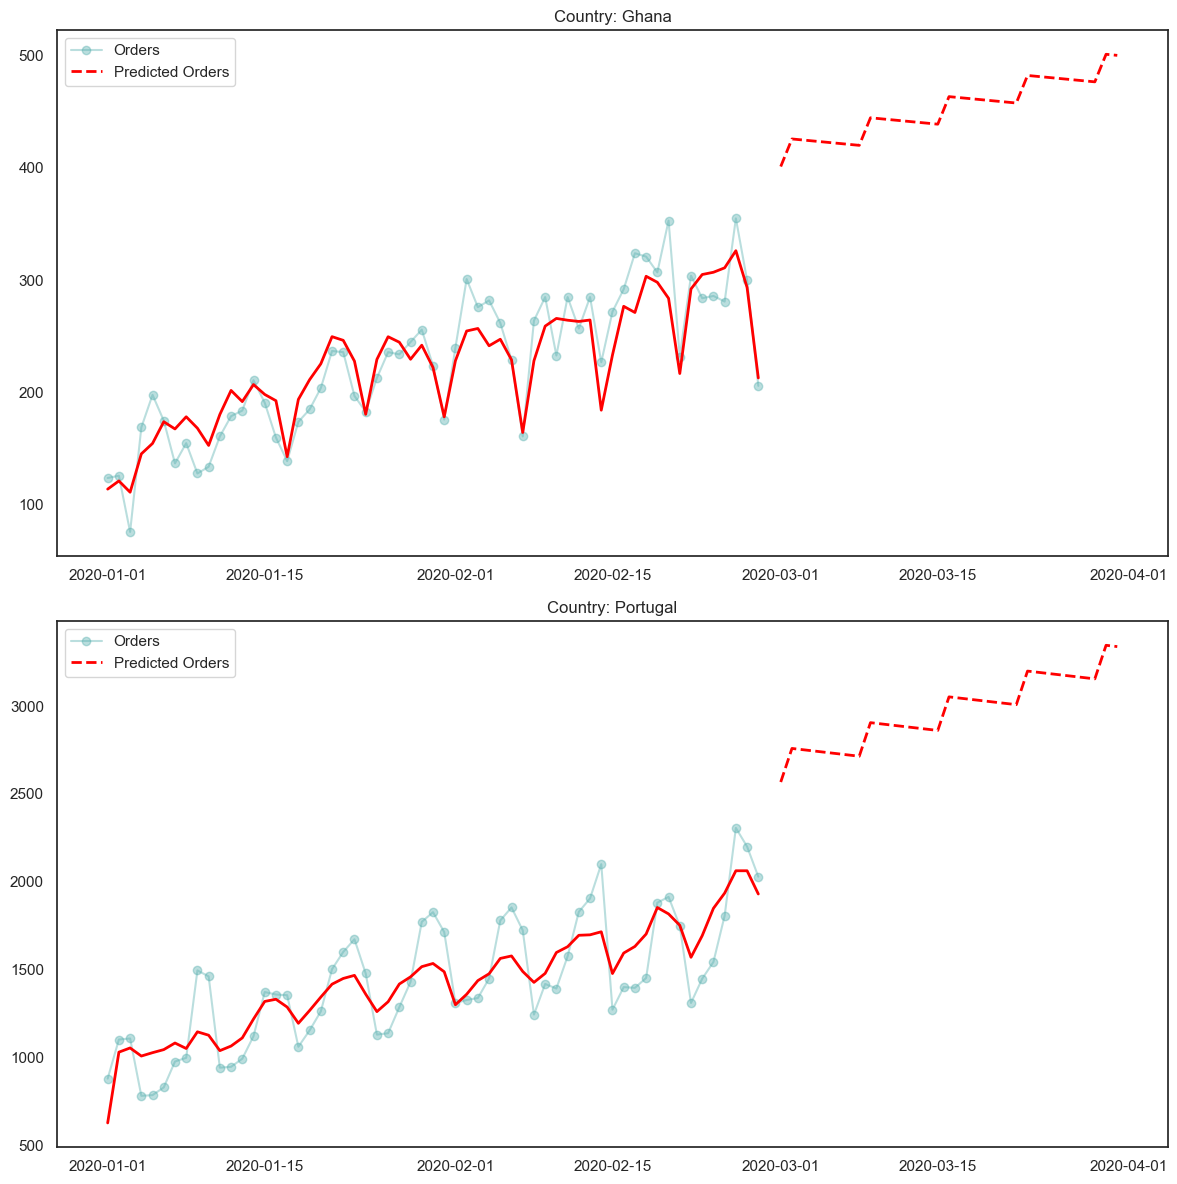

In [24]:
df_concatenated['date'] = (
    pd.to_datetime(
        '2020-' 
        + df_concatenated['month_number'].astype(str) 
        + '-' + df_concatenated['day_of_month'].astype(str)
    )
)

df_concatenated = (
    df_concatenated
    .groupby(
        ['date', 'country']
    )
    .agg(
        {
            'orders_number':'sum',
            'predicted_orders':'sum'
        }
    )
    .reset_index()
)

# Get unique countries
countries = df_concatenated['country'].unique()
n_countries = len(countries)

fig, axs = plt.subplots(n_countries, 1, figsize=(12, 6 * n_countries))

# Just in case I will re-use it over the different dataset
if n_countries == 1:
    axs = [axs]

# Plot each country in its subplot
for i, country in enumerate(countries):
    ax = axs[i]
    
    # Filter the DataFrame for plotting 'orders_number' lines
    country_data = df_concatenated[df_concatenated['country'] == country]
    
    df_before_cutoff = country_data[country_data['date'] < '2020-03-01']
    df_after_cutoff = country_data[country_data['date'] >= '2020-03-01']
    
    # Plot 'orders_number' before cutoff
    ax.plot(df_before_cutoff['date'], df_before_cutoff['orders_number'], 'o-', alpha=0.4, label='Orders')

    # Plot 'predicted_orders_number' with conditions
    ax.plot(df_before_cutoff['date'], df_before_cutoff['predicted_orders'], 'r', linewidth=2)
    ax.plot(df_after_cutoff['date'], df_after_cutoff['predicted_orders'], 'r--', linewidth=2, label='Predicted Orders')
    
    ax.set_title(f'Country: {country}')
    ax.legend()

plt.tight_layout()
plt.show()

Indeed, the model appears quite accurate until we make the assumption that every restaurant should have orders every day, which leads to overfitting. This setup needs to be adjusted, or I should consider each restaurant's availability and the probability of receiving orders daily, and incorporate this into the model before making predictions. 

However, this level of detail may be excessive for a test task.

Let's check what we will have if we apply the simple regression over the daily data.

### Simple daily linear regression

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# Generate sample data
np.random.seed(0)  # For reproducibility
dates = pd.date_range(start="2020-01-01", end="2020-02-29")
data = {
    "country": np.random.choice(["Ghana", "Portugal"], size=len(dates)),
    "date": dates,
    "weekday": dates.weekday + 1,
    "orders_number": np.random.randint(50, 200, size=len(dates))
}
df = pd.DataFrame(data)

df = (
    df_done
    .groupby(['date', 'country', 'weekday'])
    .agg(orders_number=('date', 'count'))
    .reset_index()
)

# Fit linear regression models
models = {}  # To store models for each country-weekday combination
for country in df["country"].unique():
    for weekday in range(1, 8):
        subset = df[(df["country"] == country) & (df["weekday"] == weekday)]
        X = subset.index.values.reshape(-1, 1)  # Use index as a proxy for time
        y = subset["orders_number"]
        model = LinearRegression().fit(X, y)
        models[(country, weekday)] = model

# Predict orders for March 2020
march_dates = pd.date_range(start="2020-03-01", end="2020-03-31")
predictions = []
for date in march_dates:
    weekday = date.weekday() + 1
    for country in ["Ghana", "Portugal"]:
        model = models[(country, weekday)]
        # Use index as a proxy for time for prediction
        index = np.array([(date - pd.Timestamp("2020-01-01")).days]).reshape(-1, 1)
        predicted_orders = model.predict(index)[0]
        predictions.append({
            "country": country,
            "date": date,
            "weekday": weekday,
            "predicted_orders_number": predicted_orders
        })

predictions_df = pd.DataFrame(predictions)

print(predictions_df.head())  # Show a snippet of the predictions

predictions_df.groupby('country').agg(orders_number=('predicted_orders_number', 'sum'))

    country       date  weekday  predicted_orders_number
0     Ghana 2020-03-01        7               248.908163
1  Portugal 2020-03-01        7              1217.651361
2     Ghana 2020-03-02        1               242.231293
3  Portugal 2020-03-02        1              1263.333333
4     Ghana 2020-03-03        2               251.353741


,orders_number
country,
Ghana,7886.169728
Portugal,47275.363379


Ok, that's sounds more realistic. Let's visualize it also.

In [26]:
historical_predictions = []
for index, row in df.iterrows():
    country, date, weekday, actual_orders = row["country"], row["date"], row["weekday"], row["orders_number"]
    model = models[(country, weekday)]
    # Use index as a proxy for time for prediction
    index = np.array([(date - pd.Timestamp("2020-01-01")).days]).reshape(-1, 1)
    predicted_orders = model.predict(index)[0]
    historical_predictions.append(predicted_orders)

# Add the predictions to the original DataFrame
df["predicted_orders_number"] = historical_predictions

df.head()

,date,country,weekday,orders_number,predicted_orders_number
0,2020-01-01,Ghana,3,124,135.577778
1,2020-01-01,Portugal,3,882,963.076587
2,2020-01-02,Ghana,4,126,110.276587
3,2020-01-02,Portugal,4,1104,1226.980159
4,2020-01-03,Ghana,5,76,103.606349


In [27]:
df_concatenated = pd.concat(
    [
        df,
        predictions_df
    ],
    ignore_index=True
).fillna(0)

df_concatenated

,date,country,weekday,orders_number,predicted_orders_number
0,2020-01-01,Ghana,3,124.0,135.577778
1,2020-01-01,Portugal,3,882.0,963.076587
2,2020-01-02,Ghana,4,126.0,110.276587
3,2020-01-02,Portugal,4,1104.0,1226.980159
4,2020-01-03,Ghana,5,76.0,103.606349
...,...,...,...,...,...
175,2020-03-29,Portugal,7,0.0,1405.270408
176,2020-03-30,Ghana,1,0.0,280.469388
177,2020-03-30,Portugal,1,0.0,1440.666667
178,2020-03-31,Ghana,2,0.0,292.758503


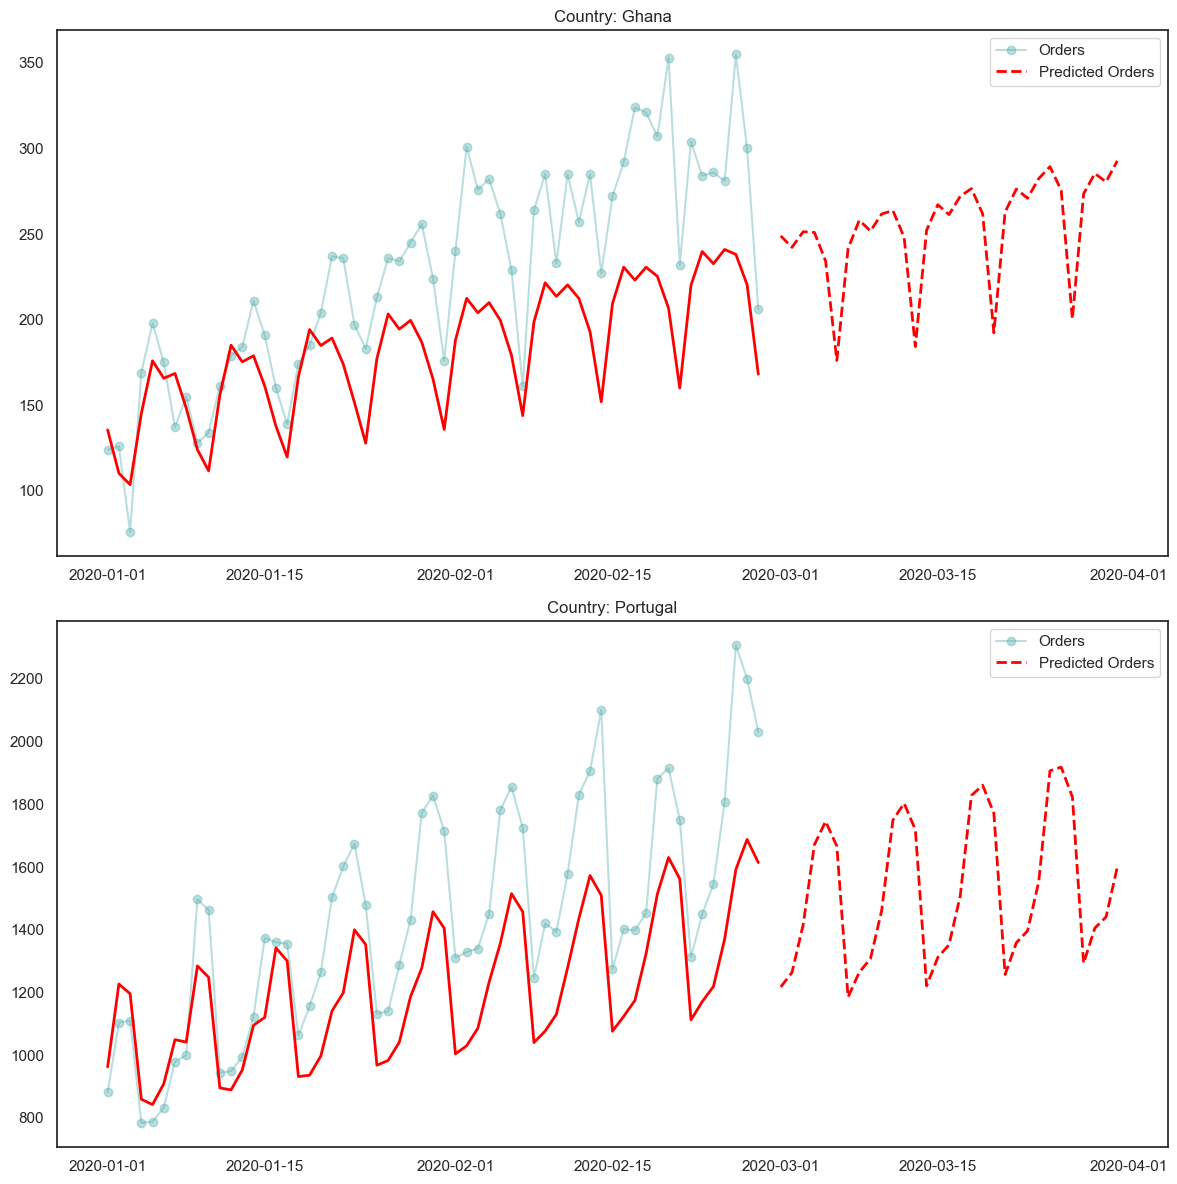

In [28]:
# Get unique countries
countries = df_concatenated['country'].unique()
n_countries = len(countries)

fig, axs = plt.subplots(n_countries, 1, figsize=(12, 6 * n_countries))

# Just in case I will need to re-use this over the different dataset
if n_countries == 1:
    axs = [axs]

# Plot each country in its subplot
for i, country in enumerate(countries):
    ax = axs[i]
    
    # Filter the DataFrame for plotting 'orders_number' lines
    country_data = df_concatenated[df_concatenated['country'] == country]
    
    df_before_cutoff = country_data[country_data['date'] < '2020-03-01']
    df_after_cutoff = country_data[country_data['date'] >= '2020-03-01']
    
    # Plot 'orders_number' before cutoff
    ax.plot(df_before_cutoff['date'], df_before_cutoff['orders_number'], 'o-', alpha=0.4, label='Orders')

    # Plot 'predicted_orders_number' with conditions
    ax.plot(df_before_cutoff['date'], df_before_cutoff['predicted_orders_number'], 'r', linewidth=2)
    ax.plot(df_after_cutoff['date'], df_after_cutoff['predicted_orders_number'], 'r--', linewidth=2, label='Predicted Orders')
    
    ax.set_title(f'Country: {country}')
    ax.legend()

plt.tight_layout()
plt.show()

## Polynomial regression
I will just apply this to the whole date range, without additional featuring, this will still consider all value fluctation and shoud give me conservative average.

Should be ok for a closest period.

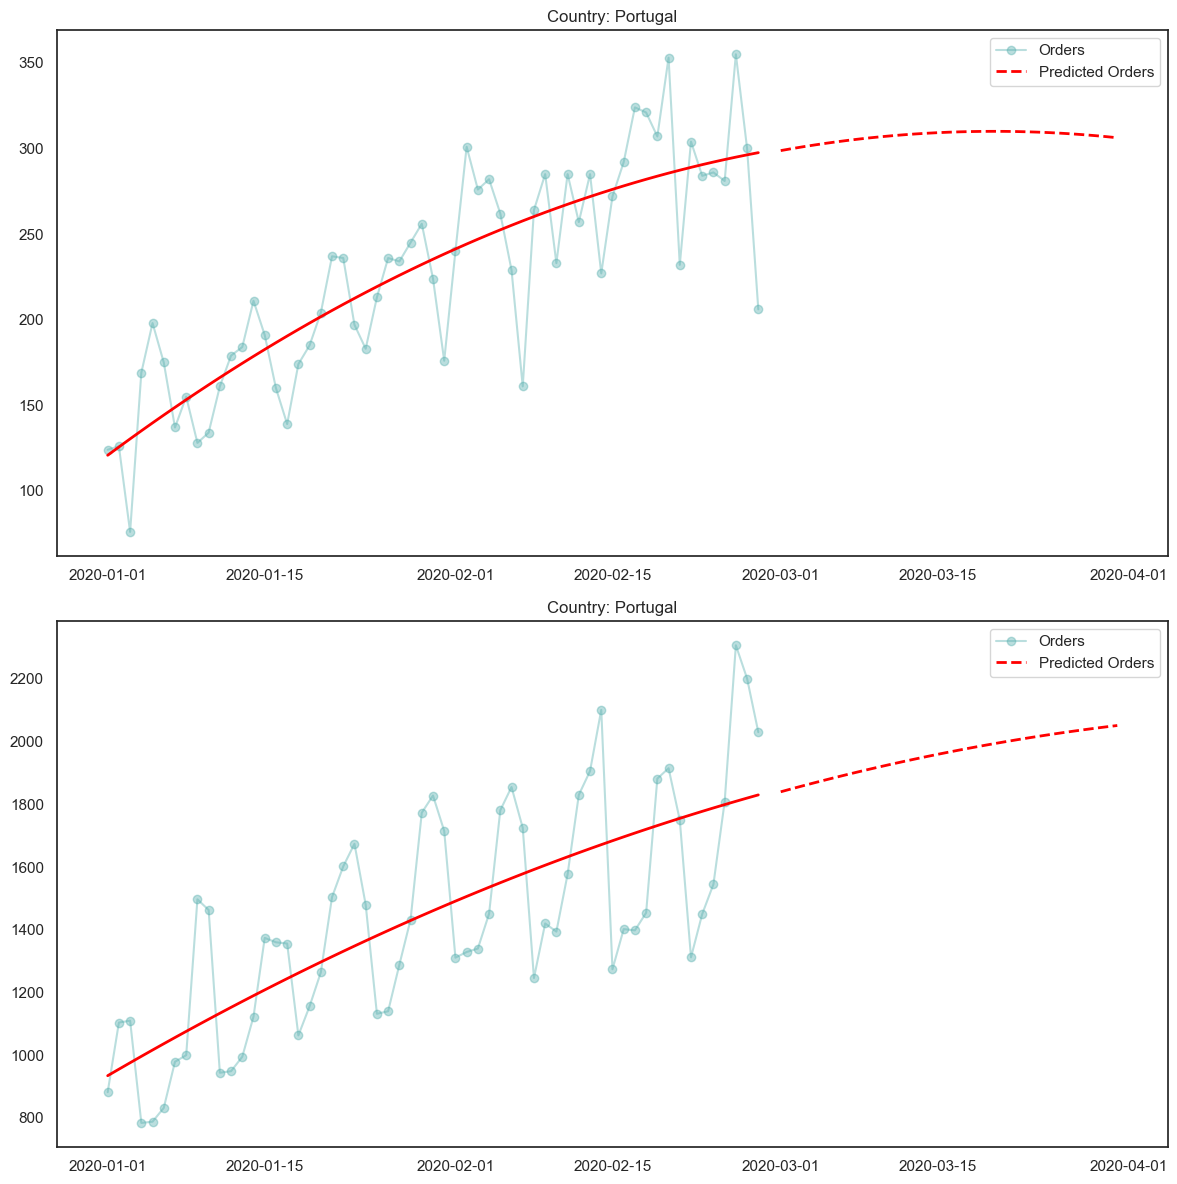

In [29]:
df_all = (
    df_done
    .groupby(['date', 'country'])
    .agg(orders_number=('date', 'count'))
    .reset_index()
)

n_countries = 2
fig, axs = plt.subplots(n_countries, 1, figsize=(12, 6 * n_countries))

if n_countries == 1:
    axs = [axs]

predictions_dict = {}

for i, c in enumerate(['Ghana', 'Portugal']):
    df = df_all[df_all['country'] == c].sort_values('date').reset_index()
    poly_func = np.poly1d(np.polyfit(df.index,df.orders_number, 2))

    x_values = np.linspace(1, 31, 31) + df.index.max()
    predictions = poly_func(x_values)
    hist_predictions = poly_func(df.index)
    df['predicted_orders_number'] = pd.Series(hist_predictions)

    march_dates = pd.date_range(start="2020-03-01", end="2020-03-31")
    df_march = pd.DataFrame({
        'date': march_dates,
        'predicted_orders_number': predictions
    })
    df_march['orders_number'] = 0

    # Saving nums for future calculations
    predictions_dict[c] = df_march.copy()

    country_data = pd.concat([df, df_march])

    ax = axs[i]
    df_before_cutoff = country_data[country_data['date'] < '2020-03-01']
    df_after_cutoff = country_data[country_data['date'] >= '2020-03-01']
    
    # Plot 'orders_number' before cutoff
    ax.plot(df_before_cutoff['date'], df_before_cutoff['orders_number'], 'o-', alpha=0.4, label='Orders')

    # Plot 'predicted_orders_number' with conditions
    ax.plot(df_before_cutoff['date'], df_before_cutoff['predicted_orders_number'], 'r', linewidth=2)
    ax.plot(df_after_cutoff['date'], df_after_cutoff['predicted_orders_number'], 'r--', linewidth=2, label='Predicted Orders')
    
    ax.set_title(f'Country: {country}')
    ax.legend()

plt.tight_layout()
plt.show()

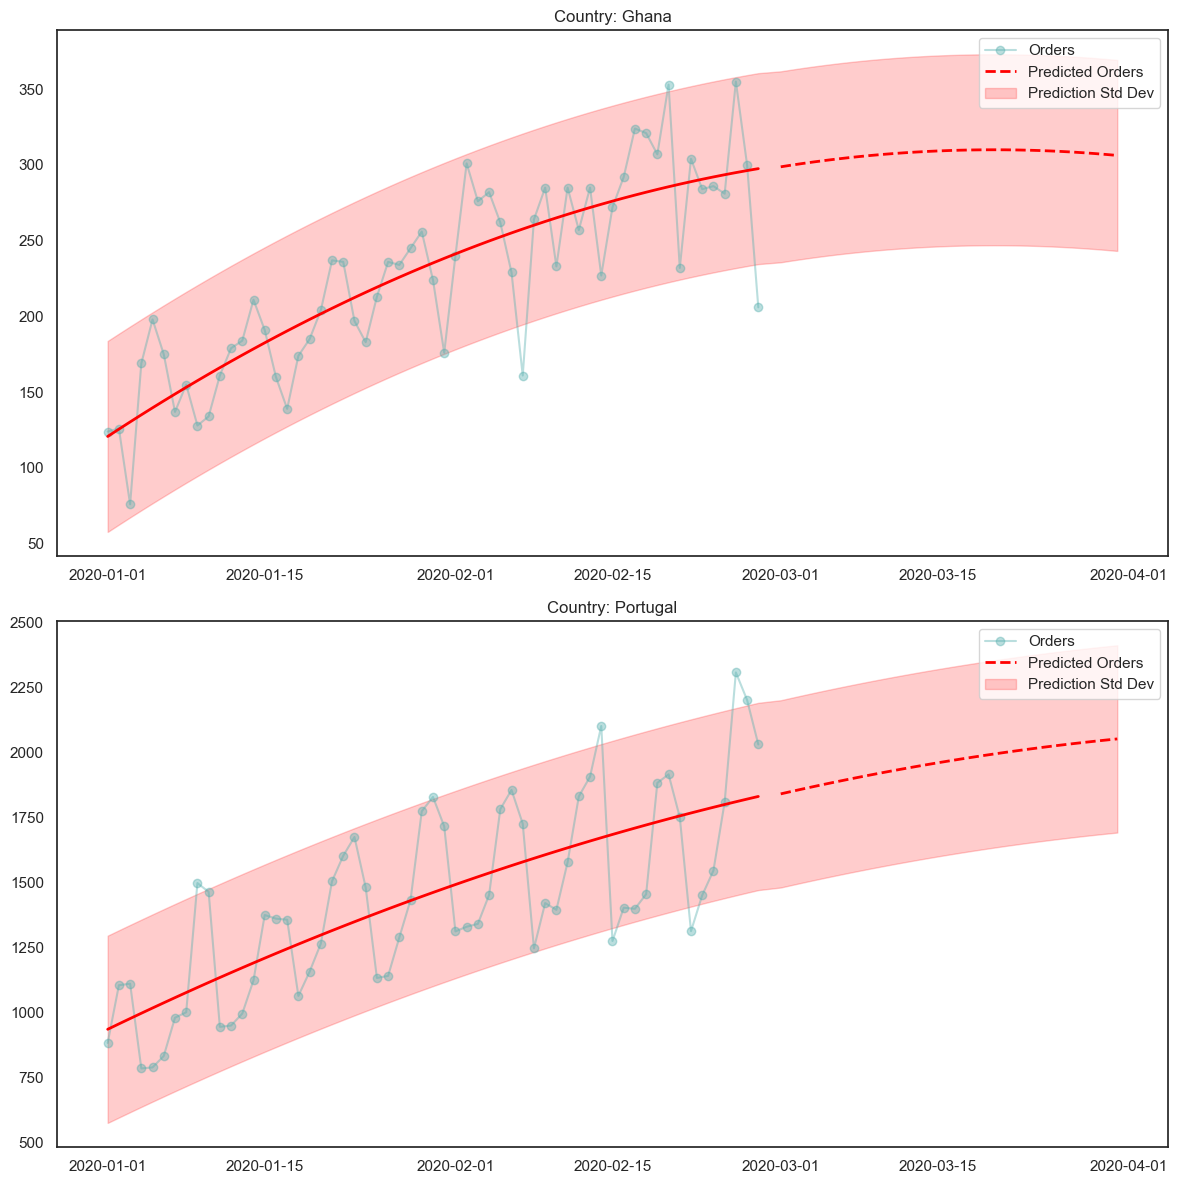

In [30]:
n_countries = 2
fig, axs = plt.subplots(n_countries, 1, figsize=(12, 6 * n_countries))
if n_countries == 1:
    axs = [axs]

predictions_dict = {}

for i, country in enumerate(['Ghana', 'Portugal']):
    df = df_all[df_all['country'] == country].sort_values('date').reset_index(drop=True)
    poly_func = np.poly1d(np.polyfit(df.index, df['orders_number'], 2))
    std_dev = df['orders_number'].std()  # Calculate standard deviation

    x_values = np.linspace(0, len(df) + 30, len(df) + 31)  # Adjusted to include prediction days
    predictions = poly_func(x_values)
    hist_predictions = poly_func(df.index)
    df['predicted_orders_number'] = pd.Series(hist_predictions)

    march_dates = pd.date_range(start="2020-03-01", end="2020-03-31")
    df_march = pd.DataFrame({
        'date': march_dates,
        'predicted_orders_number': predictions[-31:],  # Last 31 days are March predictions
        'min_predicted_orders': predictions[-31:] - std_dev,  # Subtract standard deviation
        'max_predicted_orders': predictions[-31:] + std_dev   # Add standard deviation
    })
    df_march['orders_number'] = 0  # There is no actual orders for March in predictions for now

    predictions_dict[country] = df_march.copy()

    country_data = pd.concat([df[['date', 'orders_number', 'predicted_orders_number']], df_march])

    ax = axs[i]
    df_before_cutoff = country_data[country_data['date'] < '2020-03-01']
    df_after_cutoff = country_data[country_data['date'] >= '2020-03-01']

    # Plot actual 'orders_number' before cutoff
    ax.plot(df_before_cutoff['date'], df_before_cutoff['orders_number'], 'o-', alpha=0.4, label='Orders')
    
    # Plot 'predicted_orders_number' and min/max predictions
    ax.plot(df_before_cutoff['date'], df_before_cutoff['predicted_orders_number'], 'r', linewidth=2)
    ax.plot(df_after_cutoff['date'], df_after_cutoff['predicted_orders_number'], 'r--', linewidth=2, label='Predicted Orders')
    ax.fill_between(country_data['date'], country_data['predicted_orders_number'] - std_dev, country_data['predicted_orders_number'] + std_dev, color='red', alpha=0.2, label='Prediction Std Dev')

    ax.set_title(f'Country: {country}')
    ax.legend()

plt.tight_layout()
plt.show()

Ok, so here conservative numbers are:

In [31]:
for c,df in predictions_dict.items():
    print('Country: {}'.format(c))
    print(df.agg({
        'predicted_orders_number':'sum',
        'min_predicted_orders':'sum',
        'max_predicted_orders':'sum'
    }))

Country: Ghana
predicted_orders_number     9517.331722
min_predicted_orders        7563.847770
max_predicted_orders       11470.815673
dtype: float64
Country: Portugal
predicted_orders_number    60731.557085
min_predicted_orders       49570.255454
max_predicted_orders       71892.858716
dtype: float64
